In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [ ]:
# Load the datasets
try:
  train_data=pd.read_csv('p1_train.csv')
  test_data=pd.read_csv('p1_test.csv')
except FileNotFoundError:
  print("file not found, upload the file")
  exit()


In [ ]:
train_data.columns=['feature1','feature2','health']

In [ ]:
print(train_data.columns)

Index(['feature1', 'feature2', 'health'], dtype='object')


In [ ]:
test_data.columns=['feature1','feature2','health']

In [ ]:
print(test_data.columns)

Index(['feature1', 'feature2', 'health'], dtype='object')


In [ ]:
# chaeck for null values in training data
print(train_data.isnull().sum())


feature1    0
feature2    0
health      0
dtype: int64


In [ ]:
#assuming the target variable is named health and the features are the other columns
X_train=train_data.drop('health',axis=1)
y_train=train_data['health']
X_test=test_data.drop('health',axis=1)
y_test=test_data['health']


In [ ]:
#support vector regression
svr_model=SVR()
svr_model.fit(X_train,y_train)
y_svr_predict=svr_model.predict(X_test)



In [ ]:
#evaluate the svr model
print("Support Vector Regression")
print(f"mean squared error {mean_squared_error(y_test,y_svr_predict)}")
print(f"mean absolute error {mean_absolute_error(y_test,y_svr_predict)}")


Support Vector Regression
mean squared error 5.41848217630018
mean absolute error 1.8567562894704277


In [ ]:
# Linear Regression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_lr_predict=lr_model.predict(X_test)


In [ ]:
#evaluate the linear regression model
print("\n\nLinear Regression")
print(f"mean squared error {mean_squared_error(y_test,y_lr_predict)}")
print(f"mean absolute error {mean_absolute_error(y_test,y_lr_predict)}")




Linear Regression
mean squared error 5.045760259110822
mean absolute error 1.7988557623211767


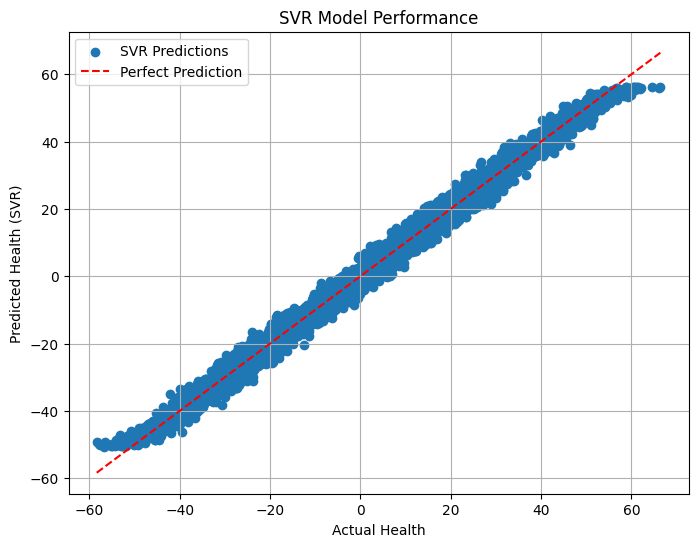

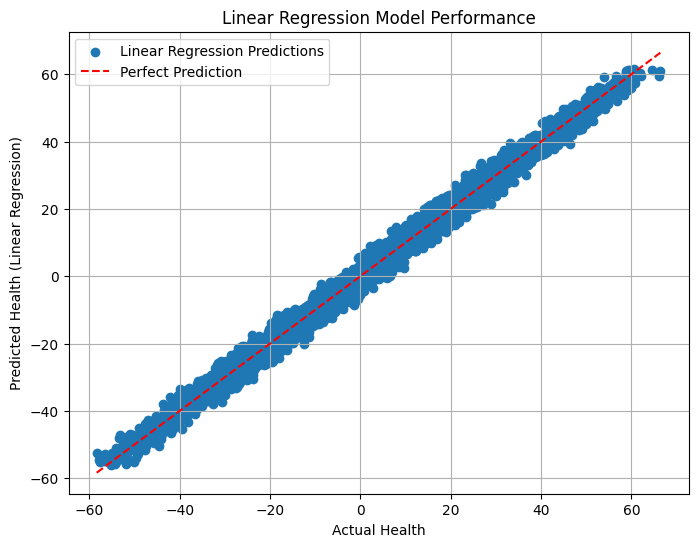

In [ ]:
#plot the data models

import matplotlib.pyplot as plt

# Plotting the predictions vs actual values for SVR

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_svr_predict, label='SVR Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Health')
plt.ylabel('Predicted Health (SVR)')
plt.title('SVR Model Performance')
plt.legend()
plt.grid(True)
plt.show()


# Plotting the predictions vs actual values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_lr_predict, label='Linear Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Health')
plt.ylabel('Predicted Health (Linear Regression)')
plt.title('Linear Regression Model Performance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# give two X values (features). if the health value (target value) is negative the organism is not healthy.  for the given two X values find out y

import numpy as np

def predict_health(feature1, feature2, model):


  input_data = np.array([[feature1, feature2]])  # Reshape input for prediction
  prediction = model.predict(input_data)
  return prediction[0]  # Extract the single prediction value


# Example usage:
x1_value = float(input())
x2_value =float(input())

svr_prediction = predict_health(x1_value, x2_value, svr_model)
lr_prediction = predict_health(x1_value, x2_value, lr_model)

print(f"SVR Prediction for ({x1_value}, {x2_value}): {svr_prediction}")
print(f"Linear Regression Prediction for ({x1_value}, {x2_value}): {lr_prediction}")


#Interpretation (Example)
if svr_prediction < 0:
  print("SVR: Organism is not healthy based on prediction.")
else:
  print("SVR: Organism is healthy based on prediction.")

if lr_prediction < 0:
  print("Linear Regression: Organism is not healthy based on prediction.")
else:
  print("Linear Regression: Organism is healthy based on prediction.")




10
3
SVR Prediction for (10.0, 3.0): -19.67975286829403
Linear Regression Prediction for (10.0, 3.0): -20.0093522958959
SVR: Organism is not healthy based on prediction.
Linear Regression: Organism is not healthy based on prediction.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
